In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/sruthi/Documents/My projects/HEADSTARTER/Anomaly Detection/FinancialMarketData.xlsx - EWS.csv')

In [3]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [4]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [10]:
from openai import OpenAI
import os
from dotenv import load_dotenv

In [11]:
load_dotenv()

True

In [14]:
# Initialize OpenAI client
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=os.getenv("GROQ_API_KEY")
)

In [32]:
query_data = df.head(10)
system_prompt = '''You are an expert financial analyst with machine learning background. You also have knowledge of how to detect anomalies in financial data. 
If given a dataframe, you will explain all column headers in a simple way.
Give context of how the column headers are related to each other and how they can affect the financial market.
Explain whether each column header will contribute to market crashes or anomalies in the financial market.
Out of all columns headers, explain which are the key columns required to train an ML model that can detect market anomalies.
Explain if any columns need to be dropped in order to create an accurate model.
'''
augmented_query = f"This is the data: {query_data}. variable Y in the dataframe is a binary indicator of a market anomaly or not."

In [33]:
llm_response = client.chat.completions.create(
       model="llama-3.1-8b-instant",
       messages=[
           {"role": "system", "content": system_prompt},
           {"role": "user", "content": augmented_query}
       ]
   )

print(llm_response.choices[0].message.content)

Based on the provided dataframe, I'll break down each column header in simple terms, explaining their relationships and how they can impact the financial market. I'll also assess which columns contribute to market crashes or anomalies and which are key for training an ML model to detect anomalies.

**Currency-related columns:**

1. **XAU**: Gold price
2. **BGNL**: EUR/GBP exchange rate
3. **BDIY**: Yen/EUR exchange rate
4. **CRY**: USD/JPY exchange rate
5. **DXY**: USD index (a measure of the US dollar's value against a basket of currencies)
6. **JPY**: Japanese yen value
7. **GBP**: Pound sterling value

These columns track the performance of various currencies and the value of gold. Changes in these rates can lead to fluctuations in asset prices and potentially trigger anomalies in the financial market.

**Stock market and trade-related columns:**

1. **ECSURPUS**: US stock market index (not explicitly specified, but likely a standard US stock market index like the S&P 500)
2. **MXUS

In [23]:
# convert Data to datetime type
df['Data'] = pd.to_datetime(df['Data'], format='%m/%d/%Y')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Y          1111 non-null   int64         
 1   Data       1111 non-null   datetime64[ns]
 2   XAU BGNL   1111 non-null   float64       
 3   ECSURPUS   1111 non-null   float64       
 4   BDIY       1111 non-null   float64       
 5   CRY        1111 non-null   float64       
 6   DXY        1111 non-null   float64       
 7   JPY        1111 non-null   float64       
 8   GBP        1111 non-null   float64       
 9   Cl1        1111 non-null   float64       
 10  VIX        1111 non-null   float64       
 11  USGG30YR   1111 non-null   float64       
 12  GT10       1111 non-null   float64       
 13  USGG2YR    1111 non-null   float64       
 14  USGG3M     1111 non-null   float64       
 15  US0001M    1111 non-null   float64       
 16  GTDEM30Y   1111 non-null   float64       


In [26]:
df.rename(columns={'Data': 'Date'}, inplace=True)

In [27]:
df.head()

,Y,Date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,2000-01-11,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,2000-01-18,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,2000-01-25,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2000-02-01,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2000-02-08,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [28]:
# drop rows that have NaN values
df.dropna(inplace=True)

In [ ]:
# create a day and month column
df['Month'] = df['Date'].dt.month

In [88]:
df.tail(20)

,Y,Date,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Month
1091,0,2020-12-08,1872.94,0.530,1121.0,158.2821,90.965,104.13,1.3362,45.60,...,1274.225,396.2514,3611.10,130.65,1075.19,1837.64,652.15,1535.63,106.16,12
1092,0,2020-12-15,1850.46,0.517,1273.0,163.0198,90.473,103.73,1.3430,47.62,...,1279.520,395.8530,3606.66,130.32,1087.23,1863.96,665.70,1551.28,104.65,12
1093,0,2020-12-22,1867.74,0.370,1330.0,163.6122,90.654,103.65,1.3357,47.02,...,1284.129,397.0582,3615.87,129.65,1077.39,1860.93,646.32,1543.19,105.85,12
1094,0,2020-12-29,1879.17,0.245,1366.0,165.3742,89.994,103.53,1.3490,48.00,...,1286.353,398.1460,3641.86,132.94,1114.27,1884.49,668.56,1591.76,105.05,12
1095,0,2021-01-05,1950.23,0.241,1418.0,171.7048,89.436,102.65,1.3633,49.93,...,1286.191,398.7065,3640.58,132.78,1098.30,1846.81,683.94,1636.95,111.33,1
1096,0,2021-01-12,1839.55,0.346,1849.0,174.9485,90.093,104.08,1.3624,53.21,...,1270.306,393.2410,3718.40,135.46,1139.92,1878.62,713.67,1677.32,112.84,1
1097,0,2021-01-19,1842.82,0.320,1766.0,174.8468,90.498,103.88,1.3625,52.98,...,1274.311,396.2644,3715.03,135.17,1141.61,1863.14,703.00,1659.52,118.46,1
1098,0,2021-01-26,1852.72,0.382,1659.0,175.4223,90.170,103.68,1.3732,52.61,...,1278.661,398.0397,3759.35,135.09,1135.71,1792.10,677.70,1631.30,122.21,1
1099,0,2021-02-02,1835.24,0.362,1380.0,178.0224,91.197,105.10,1.3647,54.76,...,1279.259,394.8006,3745.18,134.32,1132.26,1801.25,665.70,1657.77,121.33,2
1100,0,2021-02-09,1837.96,0.397,1306.0,184.2234,90.439,104.56,1.3798,58.36,...,1280.204,395.3878,3832.33,135.84,1180.79,1800.71,691.35,1701.99,125.30,2


In [89]:
# create the features and target variable
features = df.drop(columns=['Y', 'Date'])

In [90]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [91]:
features_scaled.shape

(1111, 43)

In [94]:
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)


In [95]:
# explained variance ratio: how much info can be attributed to each principal component
pca.explained_variance_ratio_

array([0.58437473, 0.15223975, 0.10755269, 0.03159724, 0.02900564,
       0.02263581, 0.02139331, 0.01022176])

PC1 holds 58.43% of the information and PC2 hold only 15.22% of the information. 

In [96]:
df.shape[0]

1111

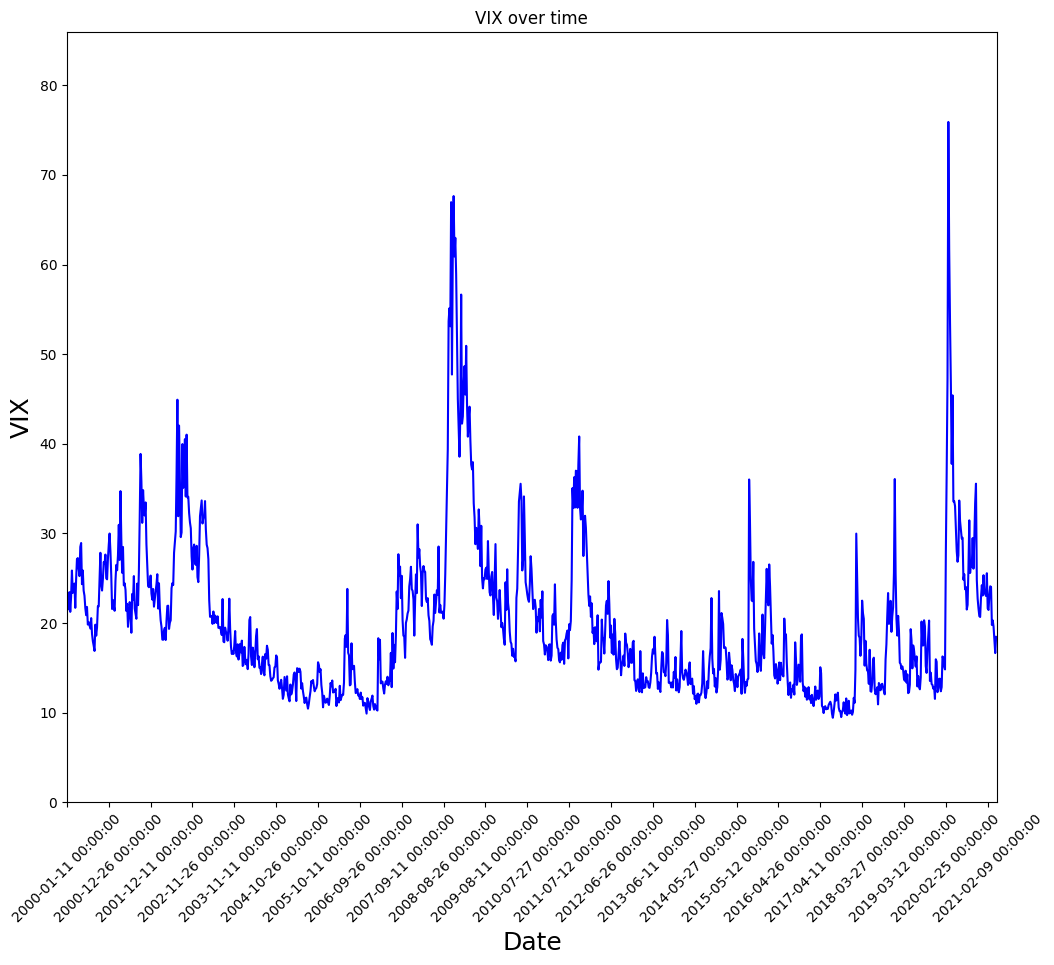

In [97]:
# Data Visualizations 
# plot anomalies with respect to VIX over time

plt.figure(figsize=(12, 10))
plt.xlim(0, df.shape[0])
plt.ylim(0, df['VIX'].max() + 10)
plt.plot(df['VIX'], color='blue', label='VIX')
plt.title('VIX over time')
plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('VIX', fontsize = 18)
plt.show()
     

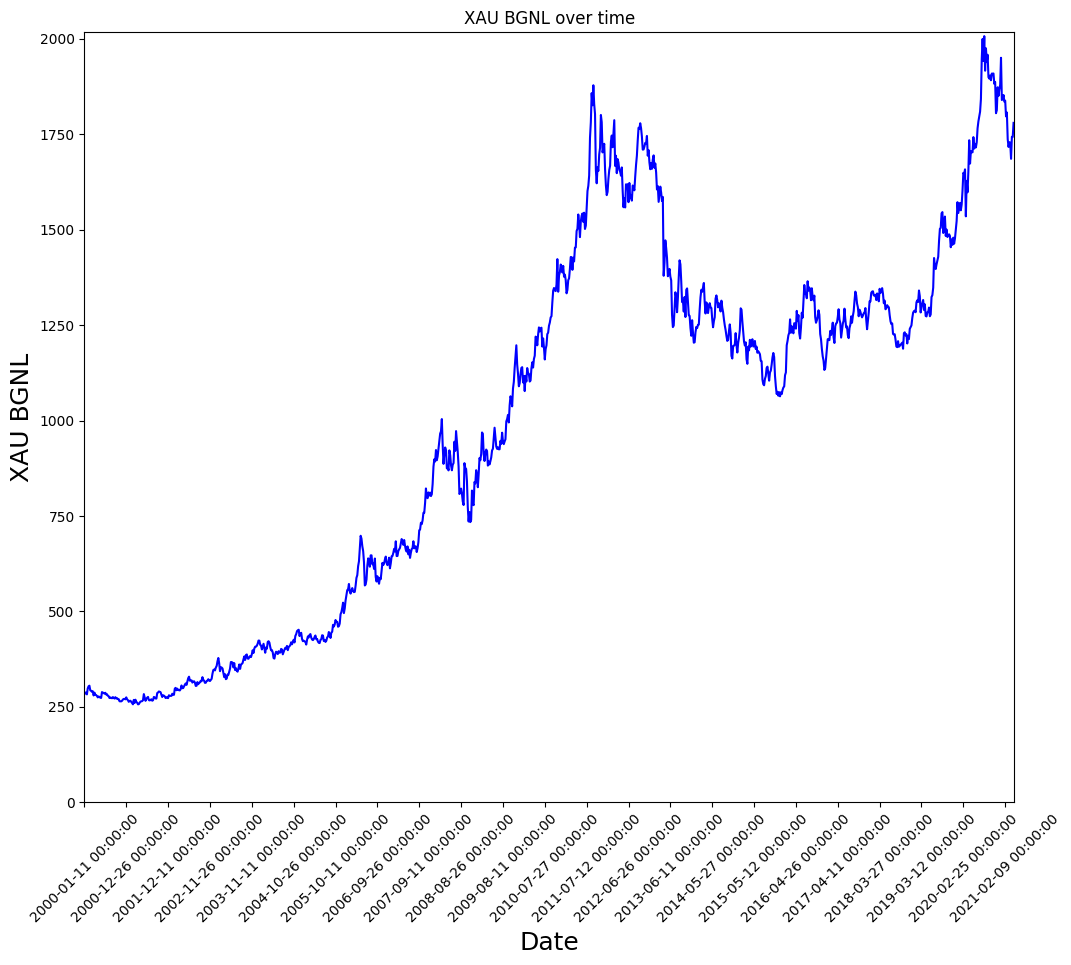

In [76]:
# Data Visualizations
plt.figure(figsize=(12, 10))
plt.xlim(0, df.shape[0])
plt.ylim(0, df['XAU BGNL'].max() + 10)
plt.plot(df['XAU BGNL'], color='blue', label='XAU BGNL')
plt.title('XAU BGNL over time')
plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('XAU BGNL', fontsize = 18)
plt.show()

In [119]:
correlation_matrix = df.corr()
# print(correlation_matrix)
strong_correlations = correlation_matrix[(correlation_matrix.abs()> 0.8) & (correlation_matrix != 1)]
print(strong_correlations[['XAU BGNL','ECSURPUS', 'BDIY', 'DXY', 'JPY', 'GT10', 'EONIA']])

           XAU BGNL  ECSURPUS  BDIY       DXY  JPY      GT10     EONIA
Y               NaN       NaN   NaN       NaN  NaN       NaN       NaN
Date       0.883657       NaN   NaN       NaN  NaN -0.881477 -0.875270
XAU BGNL        NaN       NaN   NaN       NaN  NaN -0.893317 -0.816037
ECSURPUS        NaN       NaN   NaN       NaN  NaN       NaN       NaN
BDIY            NaN       NaN   NaN       NaN  NaN       NaN       NaN
CRY             NaN       NaN   NaN       NaN  NaN       NaN       NaN
DXY             NaN       NaN   NaN       NaN  NaN       NaN       NaN
JPY             NaN       NaN   NaN       NaN  NaN       NaN       NaN
GBP             NaN       NaN   NaN       NaN  NaN       NaN       NaN
Cl1             NaN       NaN   NaN -0.816378  NaN       NaN       NaN
VIX             NaN       NaN   NaN       NaN  NaN       NaN       NaN
USGG30YR  -0.868696       NaN   NaN       NaN  NaN  0.966501  0.838987
GT10      -0.893317       NaN   NaN       NaN  NaN       NaN  0.851720
USGG2Y

In [ ]:
# Data reduced after PCA
reduced_data = pca.transform(features_scaled)

In [121]:
reduced_data.shape

(1111, 8)

In [122]:
# implement Isolation Forest on the reduced data
from sklearn.ensemble import IsolationForest

In [123]:
forest = IsolationForest(random_state=42)
forest.fit(reduced_data)

IsolationForest(random_state=42)

In [124]:
scores = forest.score_samples(reduced_data)

In [125]:
scores

array([-0.51971411, -0.52610792, -0.51517281, ..., -0.4995339 ,
       -0.49686295, -0.4937849 ])

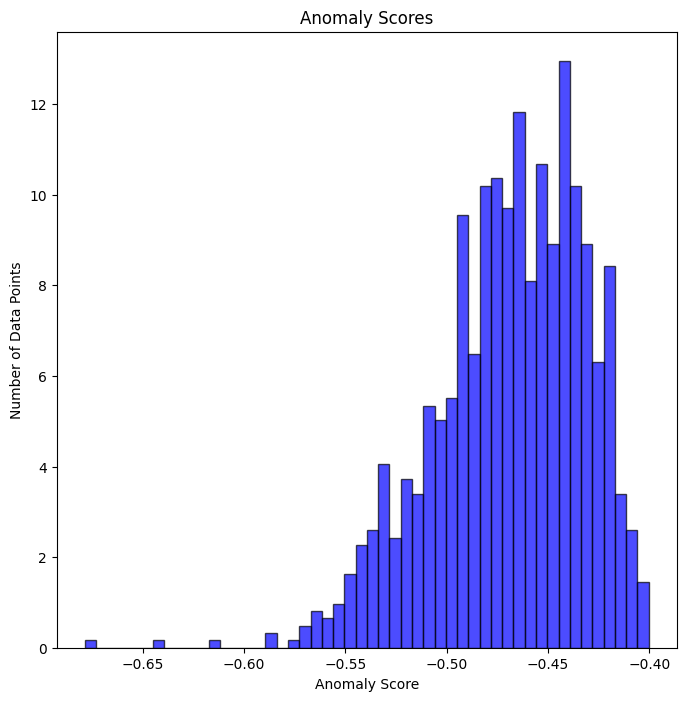

In [128]:
# plot histogram for the anomaly scores for the datapoints
plt.figure(figsize=(8,8))
plt.hist(scores, bins=50, color='blue', edgecolor='black', density=True, alpha=0.7)
plt.title('Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Data Points')
plt.show()

